# Image Captioning Coursework
This notebook will go through the different image captioning models that I have created 

In [1]:
import tensorflow as tf
from numpy.random import choice 
from pickle import load
from tensorflow.keras.models import load_model
from functions.dataset_loading import load_flicker8k_split
from functions.image_processing import display_image
from functions.text_processing import create_vocab_mappings
from functions.model_evaluation import generate_and_evaluate_caption

from keras.mixed_precision import set_global_policy
set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3080, compute capability 8.6


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Loading Flicker8K processed data from folder 
DIR = 'preprocessed_data/flicker8k/'
COCO_DIR = 'preprocessed_data/coco/'

with open(DIR + 'caption_map.pkl', 'rb') as file:
    caption_map = load(file)
    
with open(DIR + 'feature_map.pkl', 'rb') as file:
    feature_map = load(file)
    
_, _, test_images = load_flicker8k_split()

with open('preprocessed_data/vocab.pkl', 'rb') as file:
    vocab = load(file)
    
_, idx_to_word = create_vocab_mappings(vocab)


## 1. CNN + LSTM Model
This model uses the pretrined cnn __ to extract images from  

In [4]:
cnn_lstm_model = load_model('saved_models/lstm_decoder.keras')

# 3. Autoencoder + LSTM Model


In [4]:
# autoencoder_lstm_model = tf.keras.models.load_model('saved_models/autoencoder_lstm.keras')

# 4. GAN 

In [5]:
# gan_generator = keras.load_model('saved_models/gan-generator')

# 5. CNN + Transformer

In [ ]:
cnn_transformer = load_model('saved_models/transformer_decoder')

# Comparing outputs

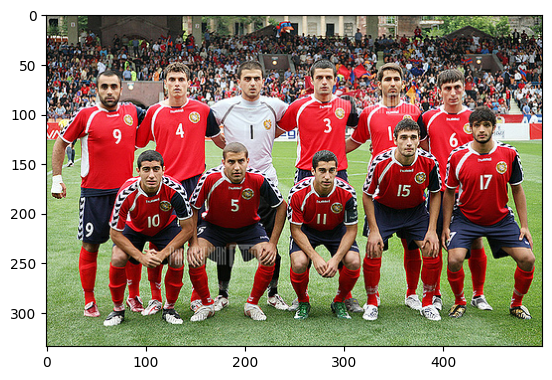

['a', 'football', 'player', 'in', 'a', 'red', 'uniform', 'is', '[UNK]', 'the', 'ball'] 0.14851485148514848
['a', 'football', 'player', 'in', 'a', 'red', 'uniform', 'and', 'white', 'uniform', 'is', '[UNK]', 'the', 'football', 'player', 'in', 'the', 'red', 'jersey'] 0.1720183486238532
['a', 'group', 'of', 'players', 'on', 'a', 'team', 'are', 'posing', 'together']


In [6]:

test_image = choice(test_images)
test_features = feature_map[test_image]
true_captions = caption_map[test_image]

display_image('datasets/flicker8k/flicker8k_images/', test_image)

greedy, beam, true_captions = generate_and_evaluate_caption(cnn_lstm_model, test_features, true_captions, idx_to_word,  20)
print(greedy[0], greedy[2])
print(beam[0], beam[2])
print(true_captions[0])